In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import collections

In [4]:
df = pd.read_csv("LABEVENTS.csv.gz",compression='gzip')

In [5]:
print(df.head())
def df_handle_nan(value):
    if value is np.nan:
        return "normal"
    else:
        return value
df['FLAG'] = df.progress_apply(lambda row : df_handle_nan(row['FLAG']), axis = 1)
print(df.head())

   ROW_ID  SUBJECT_ID  HADM_ID  ITEMID            CHARTTIME VALUE  VALUENUM  \
0     281           3      NaN   50820  2101-10-12 16:07:00  7.39      7.39   
1     282           3      NaN   50800  2101-10-12 18:17:00   ART       NaN   
2     283           3      NaN   50802  2101-10-12 18:17:00    -1     -1.00   
3     284           3      NaN   50804  2101-10-12 18:17:00    22     22.00   
4     285           3      NaN   50808  2101-10-12 18:17:00  0.93      0.93   

  VALUEUOM      FLAG  
0    units       NaN  
1      NaN       NaN  
2    mEq/L       NaN  
3    mEq/L       NaN  
4   mmol/L  abnormal  


  0%|          | 0/27854055 [00:00<?, ?it/s]

   ROW_ID  SUBJECT_ID  HADM_ID  ITEMID            CHARTTIME VALUE  VALUENUM  \
0     281           3      NaN   50820  2101-10-12 16:07:00  7.39      7.39   
1     282           3      NaN   50800  2101-10-12 18:17:00   ART       NaN   
2     283           3      NaN   50802  2101-10-12 18:17:00    -1     -1.00   
3     284           3      NaN   50804  2101-10-12 18:17:00    22     22.00   
4     285           3      NaN   50808  2101-10-12 18:17:00  0.93      0.93   

  VALUEUOM      FLAG  
0    units    normal  
1      NaN    normal  
2    mEq/L    normal  
3    mEq/L    normal  
4   mmol/L  abnormal  


In [6]:
df = df.dropna(subset=['HADM_ID','SUBJECT_ID','ITEMID'])

In [7]:
frequency = collections.Counter(list(df['FLAG']))
print(dict(frequency))

{'normal': 14149779, 'abnormal': 8059020, 'delta': 36235}


In [8]:
len(df['HADM_ID'].unique())

58151

In [9]:
len(df['SUBJECT_ID'].unique())

46201

In [10]:
lab_events = dict()
def construct_dict(row):
    if lab_events.get(row['SUBJECT_ID'])==None:
        lab_events[row['SUBJECT_ID']] = {}
    if lab_events[row['SUBJECT_ID']].get(row['HADM_ID'])==None:
        lab_events[row['SUBJECT_ID']][row['HADM_ID']] = {}
    if lab_events[row['SUBJECT_ID']][row['HADM_ID']].get(row['ITEMID'])==None:
        lab_events[row['SUBJECT_ID']][row['HADM_ID']][row['ITEMID']] = row['FLAG']
    else:
        lab_events[row['SUBJECT_ID']][row['HADM_ID']][row['ITEMID']] = row['FLAG']
    

In [11]:
df.progress_apply(lambda row: construct_dict(row), axis=1)

  0%|          | 0/22245034 [00:00<?, ?it/s]

160         None
161         None
162         None
163         None
164         None
            ... 
27854050    None
27854051    None
27854052    None
27854053    None
27854054    None
Length: 22245034, dtype: object

In [ ]:
lab_events

In [12]:
datadf = pd.DataFrame.from_dict({(i,j): lab_events[i][j] 
                           for i in lab_events.keys() 
                           for j in lab_events[i].keys()},
                       orient='index')

In [13]:
datadf

,,50868,50882,50893,50902,50910,50911,50912,50931,50960,50970,...,51396,51403,51414,51019,51126,51389,51165,51166,51169,51170
3,145834.0,normal,normal,abnormal,normal,normal,normal,abnormal,normal,normal,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,185777.0,normal,normal,normal,normal,NaN,NaN,normal,abnormal,normal,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,107064.0,normal,abnormal,abnormal,normal,NaN,NaN,abnormal,normal,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,150750.0,normal,normal,abnormal,normal,abnormal,abnormal,abnormal,abnormal,abnormal,delta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,184167.0,normal,abnormal,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45124,121752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71369,199469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18054,100572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64673,189641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
datadf.columns

Int64Index([50868, 50882, 50893, 50902, 50910, 50911, 50912, 50931, 50960,
            50970,
            ...
            51396, 51403, 51414, 51019, 51126, 51389, 51165, 51166, 51169,
            51170],
           dtype='int64', length=710)

In [15]:
datadf = datadf.reset_index()

In [16]:
datadf

,level_0,level_1,50868,50882,50893,50902,50910,50911,50912,50931,...,51396,51403,51414,51019,51126,51389,51165,51166,51169,51170
0,3,145834.0,normal,normal,abnormal,normal,normal,normal,abnormal,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,185777.0,normal,normal,normal,normal,NaN,NaN,normal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,107064.0,normal,abnormal,abnormal,normal,NaN,NaN,abnormal,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,150750.0,normal,normal,abnormal,normal,abnormal,abnormal,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,184167.0,normal,abnormal,NaN,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58146,45124,121752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58147,71369,199469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58148,18054,100572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58149,64673,189641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
datadf.rename(columns = {'level_0':'SUBJECT_ID','level_1':'HADM_ID'}, inplace = True)

In [18]:
datadf

,SUBJECT_ID,HADM_ID,50868,50882,50893,50902,50910,50911,50912,50931,...,51396,51403,51414,51019,51126,51389,51165,51166,51169,51170
0,3,145834.0,normal,normal,abnormal,normal,normal,normal,abnormal,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,185777.0,normal,normal,normal,normal,NaN,NaN,normal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,107064.0,normal,abnormal,abnormal,normal,NaN,NaN,abnormal,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,150750.0,normal,normal,abnormal,normal,abnormal,abnormal,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,184167.0,normal,abnormal,NaN,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58146,45124,121752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58147,71369,199469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58148,18054,100572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58149,64673,189641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
test_ids = list(df['ITEMID'].unique())

In [20]:
nan_freq = dict()
for tid in test_ids:
    nan_freq[tid] = datadf[tid].isna().sum()

In [21]:
nan_freq = sorted(nan_freq.items(), key=lambda x:x[1])

In [22]:
nan_freq

[(51221, 1049),
 (51301, 1160),
 (51265, 1175),
 (51222, 1201),
 (51249, 1209),
 (51248, 1210),
 (51250, 1210),
 (51279, 1210),
 (51277, 1218),
 (50971, 5273),
 (50983, 5292),
 (50902, 5299),
 (50882, 5320),
 (50868, 5343),
 (51006, 7143),
 (50912, 7153),
 (50931, 7753),
 (50960, 8388),
 (50893, 9149),
 (50970, 9242),
 (51237, 9916),
 (51274, 9925),
 (51275, 10082),
 (51244, 13902),
 (51254, 13902),
 (51256, 13902),
 (51146, 13903),
 (51200, 13903),
 (50885, 18475),
 (50820, 19233),
 (51491, 20494),
 (51498, 20599),
 (50802, 20792),
 (50804, 20794),
 (50821, 20799),
 (50818, 20803),
 (50813, 23595),
 (51492, 24041),
 (50861, 24485),
 (50878, 24515),
 (50863, 24577),
 (51484, 25791),
 (51514, 25823),
 (51478, 26134),
 (51508, 26683),
 (51506, 27035),
 (51466, 27074),
 (51464, 27089),
 (51487, 27089),
 (51519, 27112),
 (50862, 27150),
 (51516, 27501),
 (51493, 27520),
 (51486, 27842),
 (51476, 27872),
 (50822, 28750),
 (50910, 29332),
 (50808, 29863),
 (50809, 31434),
 (50800, 31527),
 (

In [23]:
t = [(i,j) for i,j in nan_freq if j<55000]

In [24]:
len(t)

154

In [25]:
datadf.to_csv('structured_labevents_data.csv')

In [26]:
datadf = pd.read_csv('structured_labevents_data.csv',low_memory=False)
datadf

,Unnamed: 0,SUBJECT_ID,HADM_ID,50868,50882,50893,50902,50910,50911,50912,...,51396,51403,51414,51019,51126,51389,51165,51166,51169,51170
0,0,3,145834.0,normal,normal,abnormal,normal,normal,normal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,185777.0,normal,normal,normal,normal,NaN,NaN,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6,107064.0,normal,abnormal,abnormal,normal,NaN,NaN,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,9,150750.0,normal,normal,abnormal,normal,abnormal,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10,184167.0,normal,abnormal,NaN,normal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58146,58146,45124,121752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58147,58147,71369,199469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58148,58148,18054,100572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58149,58149,64673,189641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ddf = pd.read_csv('D_LABITEMS.csv')
ddf

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
...,...,...,...,...,...,...
748,749,51551,VOIDED SPECIMEN,OTHER BODY FLUID,HEMATOLOGY,NaN
749,750,51552,VOIDED SPECIMEN,STOOL,CHEMISTRY,NaN
750,751,51553,VOIDED SPECIMEN,URINE,CHEMISTRY,NaN
751,752,51554,VOIDED SPECIMEN,JOINT FLUID,HEMATOLOGY,NaN


In [28]:
Tests = ["Hematocrit","Platelet Count","Hemoglobin","MCHC","MCH","MCV","Red Blood Cells","RDW","Chloride","Anion Gap","Creatinine","Glucose","Magnesium","Calcium, Total","Phosphate","INR(PT)","PT","PTT","Lymphocytes","Monocytes","Neutrophils","Basophils","Eosinophils","PH","Base Excess","Calculated Total CO2","pCO2","Specific Gravity","Lactate","Alanine Aminotransferase (ALT)","Asparate Aminotransferase (AST)","Alkaline Phosphatase","Albumin","pO2","White Blood Cells","Chloride","PEEP"]
# Tests = [t.upper() for t in Tests]
len(Tests)

37

In [29]:
ids_to_tests = ddf[ddf['LABEL'].isin(Tests)][['ITEMID','LABEL']].set_index('ITEMID').to_dict()['LABEL']

In [30]:
item_ids = list(ddf[ddf['LABEL'].isin(Tests)]['ITEMID'])
item_ids = [str(i) for i in item_ids]

In [31]:
len(set(item_ids))

57

In [32]:
item_ids.extend(['SUBJECT_ID','HADM_ID'])
item_ids.reverse()

In [33]:
newdf = datadf[item_ids]

In [34]:
for i in item_ids:
    print(newdf[i].isna().value_counts())

False    58151
Name: HADM_ID, dtype: int64
False    58151
Name: SUBJECT_ID, dtype: int64
False    37552
True     20599
Name: 51498, dtype: int64
True     58147
False        4
Name: 51480, dtype: int64
False    32017
True     26134
Name: 51478, dtype: int64
True     56022
False     2129
Name: 51474, dtype: int64
True     58059
False       92
Name: 51345, dtype: int64
False    56991
True      1160
Name: 51301, dtype: int64
False    56941
True      1210
Name: 51279, dtype: int64
False    56933
True      1218
Name: 51277, dtype: int64
False    48069
True     10082
Name: 51275, dtype: int64
False    48226
True      9925
Name: 51274, dtype: int64
False    56976
True      1175
Name: 51265, dtype: int64
False    44249
True     13902
Name: 51256, dtype: int64
False    44249
True     13902
Name: 51254, dtype: int64
False    56941
True      1210
Name: 51250, dtype: int64
False    56942
True      1209
Name: 51249, dtype: int64
False    56941
True      1210
Name: 51248, dtype: int64
False    44249


In [7]:
icd9 = ['401.9','38.93','428.0','427.31','414.01','96.04','96.6','584.9','250.00','96.71','272.4','518.81','99.04','39.61','599.0','530.81','96.72','272.0','285.9','88.56','244.9','486','38.91','285.1','36.15','276.2','496','99.15',
 '995.92','V58.61','507.0','038.9','88.72','585.9', '403.90','311','305.1','37.22','412','33.24','39.95','287.5','410.71','276.1','V45.81','424.0','45.13','V15.82','511.9','37.23']

In [36]:
len(icd9)

50

In [8]:
icd9df = pd.read_csv('ALL_CODES.csv',dtype={"ICD9_CODE": str})

In [9]:
icd9df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,403.01
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,582.81
3,1300,109,172335,4.0,585.5
4,1301,109,172335,5.0,425.4


In [10]:
icd9df = icd9df[icd9df['ICD9_CODE'].isin(icd9)]

In [11]:
icd9df = icd9df.drop(['ROW_ID','SEQ_NUM'], axis=1)

In [12]:
icd9df = icd9df.groupby(['SUBJECT_ID','HADM_ID']).aggregate([('ICD9_CODE',';'.join)])

In [13]:
icd9df = icd9df.droplevel(axis=1, level=1).reset_index()

In [14]:
icd9df

,SUBJECT_ID,HADM_ID,ICD9_CODE
0,3,145834,038.9;584.9;410.71;428.0;96.04;96.72;38.93;96.6
1,4,185777,38.93;88.72
2,6,107064,285.9;V15.82;99.04
3,9,150750,507.0;428.0;584.9;401.9;96.72;96.04
4,10,184167,99.15;96.6
...,...,...,...
51083,99985,176670,038.9;518.81;995.92;244.9;272.4;285.9;530.81;9...
51084,99991,151118,038.9;584.9;995.92;428.0;250.00
51085,99992,197084,285.1;584.9;530.81;401.9
51086,99995,137810,285.1;250.00;272.4;V45.81;428.0;V15.82;V58.61;...


In [15]:
df = pd.read_csv('combined_final.csv')
df.head()

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,Nystatin-Triamcinolone Cream,Phenytoin Sodium (IV),Activated Charcoal-Sorbitol,5 Syringes (NS),Amino Acids 4.25%-Dextrose 5%,rocuronium,Sodium Chloride 3% Inhalation Soln,Prazosin,300 mcg Vial,Syringe (Sterile Water)
0,4,185777,38.93;88.72,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,12,112213,401.9;99.15;38.93;96.04;96.71,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,21,109451,410.71;584.9;428.0;507.0;427.31;414.01;250.00;...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,111970,427.31;511.9;995.92;250.00;285.9;414.01;244.9;...,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
del df['ICD9_CODE']
df.head()

,SUBJECT_ID,HADM_ID,51498,51478,51301,51279,51277,51275,51274,51265,...,Nystatin-Triamcinolone Cream,Phenytoin Sodium (IV),Activated Charcoal-Sorbitol,5 Syringes (NS),Amino Acids 4.25%-Dextrose 5%,rocuronium,Sodium Chloride 3% Inhalation Soln,Prazosin,300 mcg Vial,Syringe (Sterile Water)
0,4,185777,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,9,150750,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,12,112213,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,21,109451,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,21,111970,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df = pd.merge(icd9df,df,on=['HADM_ID','SUBJECT_ID'],how='inner')

In [18]:
df.head()

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,Nystatin-Triamcinolone Cream,Phenytoin Sodium (IV),Activated Charcoal-Sorbitol,5 Syringes (NS),Amino Acids 4.25%-Dextrose 5%,rocuronium,Sodium Chloride 3% Inhalation Soln,Prazosin,300 mcg Vial,Syringe (Sterile Water)
0,4,185777,38.93;88.72,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,12,112213,401.9;99.15;38.93;96.04;96.71,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,21,109451,410.71;584.9;428.0;507.0;427.31;414.01;250.00;...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,111970,427.31;511.9;995.92;250.00;285.9;414.01;244.9;...,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.to_csv('combined_final.csv',index=False)

In [45]:
df

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51480,51478,51474,51345,51301,51279,...,51442,51427,51419,51387,51379,51375,51368,51367,51355,51347
0,3,145834,038.9;584.9;410.71;428.0;96.04;96.72;38.93;96.6,normal,NaN,normal,NaN,NaN,normal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,185777,38.93;88.72,normal,NaN,normal,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,107064,285.9;V15.82;99.04,NaN,NaN,NaN,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,159514,93.90,NaN,NaN,NaN,NaN,NaN,abnormal,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,normal,NaN,normal,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50817,99985,176670,038.9;518.81;995.92;244.9;272.4;285.9;530.81;9...,normal,NaN,normal,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50818,99991,151118,038.9;584.9;995.92;428.0;250.00,normal,NaN,normal,NaN,NaN,normal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50819,99992,197084,285.1;584.9;530.81;401.9,normal,NaN,normal,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50820,99995,137810,285.1;250.00;272.4;V45.81;428.0;V15.82;V58.61;...,normal,NaN,NaN,NaN,NaN,normal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.dropna(subset = ['ICD9_CODE'])

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51480,51478,51474,51345,51301,51279,...,51442,51427,51419,51387,51379,51375,51368,51367,51355,51347
0,3,145834,038.9;584.9;410.71;428.0;96.04;96.72;38.93;96.6,normal,NaN,normal,NaN,NaN,normal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,185777,38.93;88.72,normal,NaN,normal,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,107064,285.9;V15.82;99.04,NaN,NaN,NaN,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,159514,93.90,NaN,NaN,NaN,NaN,NaN,abnormal,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,normal,NaN,normal,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50817,99985,176670,038.9;518.81;995.92;244.9;272.4;285.9;530.81;9...,normal,NaN,normal,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50818,99991,151118,038.9;584.9;995.92;428.0;250.00,normal,NaN,normal,NaN,NaN,normal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50819,99992,197084,285.1;584.9;530.81;401.9,normal,NaN,normal,NaN,NaN,abnormal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50820,99995,137810,285.1;250.00;272.4;V45.81;428.0;V15.82;V58.61;...,normal,NaN,NaN,NaN,NaN,normal,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
nan_freq = dict()
for tid in item_ids:
    nan_freq[tid] = df[tid].isna().sum()

In [48]:
nan_freq

{'HADM_ID': 0,
 'SUBJECT_ID': 0,
 '51498': 14597,
 '51480': 50818,
 '51478': 19965,
 '51474': 48701,
 '51345': 50735,
 '51301': 240,
 '51279': 260,
 '51277': 265,
 '51275': 4711,
 '51274': 4561,
 '51265': 231,
 '51256': 12019,
 '51254': 12019,
 '51250': 260,
 '51249': 259,
 '51248': 260,
 '51244': 12019,
 '51237': 4553,
 '51222': 254,
 '51221': 181,
 '51200': 12020,
 '51146': 12020,
 '51120': 49533,
 '51116': 49533,
 '51114': 50502,
 '51112': 50769,
 '50970': 3989,
 '50960': 3168,
 '50931': 2683,
 '50912': 2129,
 '50902': 744,
 '50893': 3931,
 '50878': 18178,
 '50868': 776,
 '50863': 18210,
 '50862': 20660,
 '50861': 18150,
 '50821': 14582,
 '50819': 37158,
 '50818': 14586,
 '50813': 17436,
 '50811': 27913,
 '50809': 25114,
 '50804': 14577,
 '50802': 14575,
 '51446': 49191,
 '51444': 50318,
 '51442': 50734,
 '51427': 49359,
 '51419': 50349,
 '51387': 50755,
 '51379': 50511,
 '51375': 50511,
 '51368': 50793,
 '51367': 50819,
 '51355': 48456,
 '51347': 50422}

In [49]:
ids_to_tests

{51347: 'Eosinophils',
 51355: 'Monocytes',
 51367: 'Basophils',
 51368: 'Eosinophils',
 51375: 'Lymphocytes',
 51379: 'Monocytes',
 51387: 'Basophils',
 51419: 'Eosinophils',
 51427: 'Lymphocytes',
 51442: 'Basophils',
 51444: 'Eosinophils',
 51446: 'Lymphocytes',
 50802: 'Base Excess',
 50804: 'Calculated Total CO2',
 50809: 'Glucose',
 50811: 'Hemoglobin',
 50813: 'Lactate',
 50818: 'pCO2',
 50819: 'PEEP',
 50821: 'pO2',
 50861: 'Alanine Aminotransferase (ALT)',
 50862: 'Albumin',
 50863: 'Alkaline Phosphatase',
 50868: 'Anion Gap',
 50878: 'Asparate Aminotransferase (AST)',
 50893: 'Calcium, Total',
 50902: 'Chloride',
 50912: 'Creatinine',
 50931: 'Glucose',
 50960: 'Magnesium',
 50970: 'Phosphate',
 51112: 'Basophils',
 51114: 'Eosinophils',
 51116: 'Lymphocytes',
 51120: 'Monocytes',
 51146: 'Basophils',
 51200: 'Eosinophils',
 51221: 'Hematocrit',
 51222: 'Hemoglobin',
 51237: 'INR(PT)',
 51244: 'Lymphocytes',
 51248: 'MCH',
 51249: 'MCHC',
 51250: 'MCV',
 51254: 'Monocytes',
 

In [50]:
import matplotlib.pyplot as plt

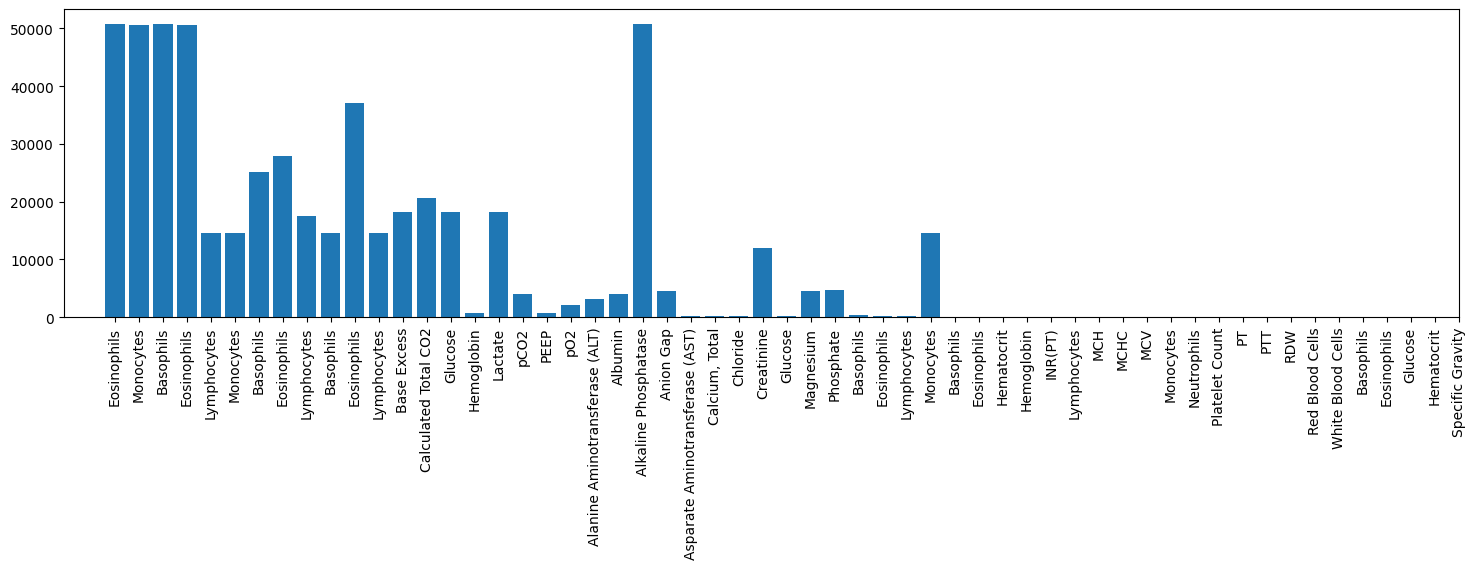

In [52]:
tests = []
num_nan = []
for item_id in ids_to_tests.keys():
    tests.append(ids_to_tests[item_id])
    num_nan.append(nan_freq[str(item_id)])
tests = np.array(tests)
num_nan = np.array(num_nan)
plt.bar(tests, num_nan)
plt.xticks(range(len(tests)), tests, rotation='vertical')
plt.rcParams['figure.figsize'] = [22, 4]
plt.show()

In [58]:
filter_ids = []
for key,value in nan_freq.items():
    if value>20000:
        print(value)
        filter_ids.append(key)
len(filter_ids)

50818
48701
50735
49533
49533
50502
50769
20660
37158
27913
25114
49191
50318
50734
49359
50349
50755
50511
50511
50793
50819
48456
50422


23

In [59]:
df.drop(filter_ids,axis=1,inplace=True)

In [60]:
df

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,50893,50878,50868,50863,50861,50821,50818,50813,50804,50802
0,3,145834,038.9;584.9;410.71;428.0;96.04;96.72;38.93;96.6,normal,normal,normal,abnormal,abnormal,abnormal,abnormal,...,abnormal,abnormal,normal,normal,normal,normal,normal,normal,normal,normal
1,4,185777,38.93;88.72,normal,normal,abnormal,abnormal,normal,normal,normal,...,normal,abnormal,normal,abnormal,normal,abnormal,abnormal,abnormal,normal,normal
2,6,107064,285.9;V15.82;99.04,NaN,NaN,abnormal,abnormal,normal,abnormal,normal,...,abnormal,normal,normal,normal,normal,abnormal,abnormal,abnormal,abnormal,normal
3,8,159514,93.90,NaN,NaN,abnormal,normal,abnormal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,normal,normal,abnormal,abnormal,normal,normal,normal,...,abnormal,normal,normal,normal,normal,abnormal,normal,normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50817,99985,176670,038.9;518.81;995.92;244.9;272.4;285.9;530.81;9...,normal,normal,abnormal,abnormal,normal,normal,normal,...,abnormal,abnormal,normal,abnormal,abnormal,abnormal,normal,normal,normal,normal
50818,99991,151118,038.9;584.9;995.92;428.0;250.00,normal,normal,normal,abnormal,normal,normal,normal,...,abnormal,NaN,normal,NaN,NaN,abnormal,normal,normal,normal,normal
50819,99992,197084,285.1;584.9;530.81;401.9,normal,normal,abnormal,abnormal,abnormal,normal,normal,...,abnormal,normal,normal,normal,normal,NaN,NaN,NaN,NaN,NaN
50820,99995,137810,285.1;250.00;272.4;V45.81;428.0;V15.82;V58.61;...,normal,NaN,normal,abnormal,abnormal,normal,abnormal,...,abnormal,abnormal,normal,normal,normal,abnormal,abnormal,normal,abnormal,normal


In [68]:
for i in filter_ids:
    del nan_freq[i]

In [69]:
len(nan_freq)

34

In [70]:
def replace_nan(value):
    if value is np.nan:
        return 'normal'
    elif value=='delta':
        return 'abnormal'
    else:
        return value
for col in nan_freq:
    df[col] = df.progress_apply(lambda row : replace_nan(row[col]), axis = 1)

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

  0%|          | 0/50822 [00:00<?, ?it/s]

In [87]:
df.to_csv('labevent_final.csv',index=False)

In [88]:
df = pd.read_csv('labevent_final.csv')
df

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,50893,50878,50868,50863,50861,50821,50818,50813,50804,50802
0,3,145834,038.9;584.9;410.71;428.0;96.04;96.72;38.93;96.6,normal,normal,normal,abnormal,abnormal,abnormal,abnormal,...,abnormal,abnormal,normal,normal,normal,normal,normal,normal,normal,normal
1,4,185777,38.93;88.72,normal,normal,abnormal,abnormal,normal,normal,normal,...,normal,abnormal,normal,abnormal,normal,abnormal,abnormal,abnormal,normal,normal
2,6,107064,285.9;V15.82;99.04,normal,normal,abnormal,abnormal,normal,abnormal,normal,...,abnormal,normal,normal,normal,normal,abnormal,abnormal,abnormal,abnormal,normal
3,8,159514,93.90,normal,normal,abnormal,normal,abnormal,normal,normal,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
4,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,normal,normal,abnormal,abnormal,normal,normal,normal,...,abnormal,normal,normal,normal,normal,abnormal,normal,normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50817,99985,176670,038.9;518.81;995.92;244.9;272.4;285.9;530.81;9...,normal,normal,abnormal,abnormal,normal,normal,normal,...,abnormal,abnormal,normal,abnormal,abnormal,abnormal,normal,normal,normal,normal
50818,99991,151118,038.9;584.9;995.92;428.0;250.00,normal,normal,normal,abnormal,normal,normal,normal,...,abnormal,normal,normal,normal,normal,abnormal,normal,normal,normal,normal
50819,99992,197084,285.1;584.9;530.81;401.9,normal,normal,abnormal,abnormal,abnormal,normal,normal,...,abnormal,normal,normal,normal,normal,normal,normal,normal,normal,normal
50820,99995,137810,285.1;250.00;272.4;V45.81;428.0;V15.82;V58.61;...,normal,normal,normal,abnormal,abnormal,normal,abnormal,...,abnormal,abnormal,normal,normal,normal,abnormal,abnormal,normal,abnormal,normal


In [137]:
mb = pd.read_csv('MICROBIOLOGYEVENTS.csv')
mb

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631721,630931,99783,126090,2125-11-05 00:00:00,2125-11-05 13:15:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0,NaN,NaN,NaN,NaN,NaN,NaN
631722,630932,99783,126090,2125-11-06 00:00:00,2125-11-06 10:24:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,1.0,NaN,NaN,NaN,NaN,NaN,NaN
631723,630933,99783,126090,2125-11-06 00:00:00,2125-11-06 10:24:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0,NaN,NaN,NaN,NaN,NaN,NaN
631724,630934,99783,126090,2125-11-07 00:00:00,2125-11-07 12:40:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
def mb_handle_nan(value):
    if value is np.nan:
        return "normal"
    else:
        return "abnormal"
mb['ORG_NAME'] = mb.progress_apply(lambda row : mb_handle_nan(row['ORG_NAME']), axis = 1)
mb.head()

  0%|          | 0/631726 [00:00<?, ?it/s]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,abnormal,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
mb = mb.dropna(subset=['HADM_ID','SUBJECT_ID','ORG_NAME'])
mb

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
14,758,101,175533,2196-09-28 00:00:00,2196-09-28 20:58:00,70079.0,URINE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,NaN,NaN,NaN,NaN,NaN,NaN
26,770,105,128744,2189-02-20 00:00:00,2189-02-20 23:30:00,70079.0,URINE,80223.0,PROBABLE ENTEROCOCCUS,1.0,NaN,NaN,NaN,NaN,NaN,NaN
27,771,106,145167,2192-08-09 00:00:00,2192-08-09 21:11:00,70062.0,SPUTUM,80023.0,STAPH AUREUS COAG +,1.0,90012.0,GENTAMICIN,<=0.5,<=,1.0,S
28,772,106,145167,2192-08-09 00:00:00,2192-08-09 21:11:00,70062.0,SPUTUM,80023.0,STAPH AUREUS COAG +,1.0,90016.0,OXACILLIN,0.5,=,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631719,630929,99783,126090,2125-11-05 00:00:00,2125-11-05 13:15:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,1.0,NaN,NaN,NaN,NaN,NaN,NaN
631720,630930,99783,126090,2125-11-05 00:00:00,2125-11-05 13:15:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0,NaN,NaN,NaN,NaN,NaN,NaN
631721,630931,99783,126090,2125-11-05 00:00:00,2125-11-05 13:15:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0,NaN,NaN,NaN,NaN,NaN,NaN
631722,630932,99783,126090,2125-11-06 00:00:00,2125-11-06 10:24:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
frequency = collections.Counter(list(mb['ORG_NAME']))
print(len(dict(frequency)))

362


In [140]:
mb_events = dict()
def construct_dict(row):
    if mb_events.get(row['SUBJECT_ID'])==None:
        mb_events[row['SUBJECT_ID']] = {}
    if mb_events[row['SUBJECT_ID']].get(row['HADM_ID'])==None:
        mb_events[row['SUBJECT_ID']][row['HADM_ID']] = {}
    if mb_events[row['SUBJECT_ID']][row['HADM_ID']].get(row['ORG_NAME'])==None:
        mb_events[row['SUBJECT_ID']][row['HADM_ID']][row['ORG_NAME']] = 'positive'
    else:
        mb_events[row['SUBJECT_ID']][row['HADM_ID']][row['ORG_NAME']] = 'positive'
mb.progress_apply(lambda row: construct_dict(row), axis=1)

  0%|          | 0/328016 [00:00<?, ?it/s]

0         None
14        None
26        None
27        None
28        None
          ... 
631719    None
631720    None
631721    None
631722    None
631723    None
Length: 328016, dtype: object

In [141]:
datadf = pd.DataFrame.from_dict({(i,j): mb_events[i][j] 
                           for i in mb_events.keys() 
                           for j in mb_events[i].keys()},
                       orient='index')

In [142]:
datadf

,,PSEUDOMONAS AERUGINOSA,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",STAPH AUREUS COAG +,PROBABLE ENTEROCOCCUS,RESEMBLING MICROCOCCUS/STOMATOCOCCUS SPECIES,VIRIDANS STREPTOCOCCI,GRAM POSITIVE BACTERIA,YEAST,ENTEROBACTER CLOACAE,ENTEROCOCCUS SP.,...,ALCALIGENES FAECALIS,PSEUDOMONAS FLUORESCENS,AEROMONAS HYDROPHILIA COMPLEX,TICK CONSISTENT WITH IXODES SPECIES,GARDNERELLA VAGINALIS,HISTOPLASMA CAPSULATUM,STEMPHYLIUM SP.,LEPTOTRICHIA TREVISANII,BEAUVERIA BASSIANA,STREPTOCOCCUS MUTANS
96,170324,positive,positive,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,112213,positive,NaN,NaN,NaN,NaN,NaN,NaN,positive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,197661,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,112906,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,138459,positive,positive,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70466,148865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76524,113461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60295,182164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82505,166023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,positive,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
datadf = datadf.reset_index()
datadf

,level_0,level_1,PSEUDOMONAS AERUGINOSA,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",STAPH AUREUS COAG +,PROBABLE ENTEROCOCCUS,RESEMBLING MICROCOCCUS/STOMATOCOCCUS SPECIES,VIRIDANS STREPTOCOCCI,GRAM POSITIVE BACTERIA,YEAST,...,ALCALIGENES FAECALIS,PSEUDOMONAS FLUORESCENS,AEROMONAS HYDROPHILIA COMPLEX,TICK CONSISTENT WITH IXODES SPECIES,GARDNERELLA VAGINALIS,HISTOPLASMA CAPSULATUM,STEMPHYLIUM SP.,LEPTOTRICHIA TREVISANII,BEAUVERIA BASSIANA,STREPTOCOCCUS MUTANS
0,96,170324,positive,positive,positive,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,112213,positive,NaN,NaN,NaN,NaN,NaN,NaN,positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26,197661,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,124,112906,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,145,138459,positive,positive,positive,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20571,70466,148865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20572,76524,113461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20573,60295,182164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20574,82505,166023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,positive,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
datadf.rename(columns = {'level_0':'SUBJECT_ID','level_1':'HADM_ID'}, inplace = True)
datadf

,SUBJECT_ID,HADM_ID,PSEUDOMONAS AERUGINOSA,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",STAPH AUREUS COAG +,PROBABLE ENTEROCOCCUS,RESEMBLING MICROCOCCUS/STOMATOCOCCUS SPECIES,VIRIDANS STREPTOCOCCI,GRAM POSITIVE BACTERIA,YEAST,...,ALCALIGENES FAECALIS,PSEUDOMONAS FLUORESCENS,AEROMONAS HYDROPHILIA COMPLEX,TICK CONSISTENT WITH IXODES SPECIES,GARDNERELLA VAGINALIS,HISTOPLASMA CAPSULATUM,STEMPHYLIUM SP.,LEPTOTRICHIA TREVISANII,BEAUVERIA BASSIANA,STREPTOCOCCUS MUTANS
0,96,170324,positive,positive,positive,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,112213,positive,NaN,NaN,NaN,NaN,NaN,NaN,positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26,197661,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,124,112906,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,145,138459,positive,positive,positive,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20571,70466,148865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20572,76524,113461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20573,60295,182164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20574,82505,166023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,positive,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
test_ids = list(mb['ORG_NAME'].unique())
nan_freq = dict()
for tid in test_ids:
    nan_freq[tid] = datadf[tid].isna().sum()
nan_freq = sorted(nan_freq.items(), key=lambda x:x[1])
nan_freq

[('YEAST', 14540),
 ('STAPH AUREUS COAG +', 15387),
 ('STAPHYLOCOCCUS, COAGULASE NEGATIVE', 15809),
 ('ESCHERICHIA COLI', 17494),
 ('ENTEROCOCCUS SP.', 17692),
 ('GRAM NEGATIVE ROD(S)', 18076),
 ('PSEUDOMONAS AERUGINOSA', 18766),
 ('KLEBSIELLA PNEUMONIAE', 19001),
 ('POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS', 19272),
 ('CLOSTRIDIUM DIFFICILE', 19497),
 ('CORYNEBACTERIUM SPECIES (DIPHTHEROIDS)', 19557),
 ('GRAM POSITIVE BACTERIA', 19710),
 ('2ND ISOLATE', 19887),
 ('CANDIDA ALBICANS, PRESUMPTIVE IDENTIFICATION', 19908),
 ('GRAM NEGATIVE ROD #2', 19910),
 ('PROTEUS MIRABILIS', 19951),
 ('PROBABLE ENTEROCOCCUS', 20009),
 ('ENTEROBACTER CLOACAE', 20028),
 ('VIRIDANS STREPTOCOCCI', 20187),
 ('HAEMOPHILUS INFLUENZAE, BETA-LACTAMASE NEGATIVE', 20205),
 ('STENOTROPHOMONAS (XANTHOMONAS) MALTOPHILIA', 20209),
 ('ENTEROCOCCUS FAECIUM', 20215),
 ('BETA STREPTOCOCCUS GROUP B', 20219),
 ('SERRATIA MARCESCENS', 20226),
 ('CANDIDA ALBICANS', 20232),
 ('BACTEROIDES FRAGILIS GROUP', 20234),
 ('KL

In [146]:
def mb_replace_nan(value):
    if value is np.nan:
        return 'negative'
    else:
        return value
for col in tqdm(test_ids):
    datadf[col] = datadf.apply(lambda row : mb_replace_nan(row[col]), axis = 1)

  0%|          | 0/362 [00:00<?, ?it/s]

In [147]:
datadf.head()

,SUBJECT_ID,HADM_ID,PSEUDOMONAS AERUGINOSA,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",STAPH AUREUS COAG +,PROBABLE ENTEROCOCCUS,RESEMBLING MICROCOCCUS/STOMATOCOCCUS SPECIES,VIRIDANS STREPTOCOCCI,GRAM POSITIVE BACTERIA,YEAST,...,ALCALIGENES FAECALIS,PSEUDOMONAS FLUORESCENS,AEROMONAS HYDROPHILIA COMPLEX,TICK CONSISTENT WITH IXODES SPECIES,GARDNERELLA VAGINALIS,HISTOPLASMA CAPSULATUM,STEMPHYLIUM SP.,LEPTOTRICHIA TREVISANII,BEAUVERIA BASSIANA,STREPTOCOCCUS MUTANS
0,96,170324,positive,positive,positive,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
1,12,112213,positive,negative,negative,negative,negative,negative,negative,positive,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
2,26,197661,positive,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
3,124,112906,positive,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
4,145,138459,positive,positive,positive,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative


In [148]:
datadf.to_csv('microbiologyevents_final.csv',index=False)

In [149]:
mb = pd.read_csv('microbiologyevents_final.csv')
mb

,SUBJECT_ID,HADM_ID,PSEUDOMONAS AERUGINOSA,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",STAPH AUREUS COAG +,PROBABLE ENTEROCOCCUS,RESEMBLING MICROCOCCUS/STOMATOCOCCUS SPECIES,VIRIDANS STREPTOCOCCI,GRAM POSITIVE BACTERIA,YEAST,...,ALCALIGENES FAECALIS,PSEUDOMONAS FLUORESCENS,AEROMONAS HYDROPHILIA COMPLEX,TICK CONSISTENT WITH IXODES SPECIES,GARDNERELLA VAGINALIS,HISTOPLASMA CAPSULATUM,STEMPHYLIUM SP.,LEPTOTRICHIA TREVISANII,BEAUVERIA BASSIANA,STREPTOCOCCUS MUTANS
0,96,170324,positive,positive,positive,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
1,12,112213,positive,negative,negative,negative,negative,negative,negative,positive,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
2,26,197661,positive,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
3,124,112906,positive,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
4,145,138459,positive,positive,positive,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20571,70466,148865,negative,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
20572,76524,113461,negative,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
20573,60295,182164,negative,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
20574,82505,166023,negative,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,negative,positive,negative,negative,negative,negative,negative,negative


In [150]:
df

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,50893,50878,50868,50863,50861,50821,50818,50813,50804,50802
0,3,145834,038.9;584.9;410.71;428.0;96.04;96.72;38.93;96.6,normal,normal,normal,abnormal,abnormal,abnormal,abnormal,...,abnormal,abnormal,normal,normal,normal,normal,normal,normal,normal,normal
1,4,185777,38.93;88.72,normal,normal,abnormal,abnormal,normal,normal,normal,...,normal,abnormal,normal,abnormal,normal,abnormal,abnormal,abnormal,normal,normal
2,6,107064,285.9;V15.82;99.04,normal,normal,abnormal,abnormal,normal,abnormal,normal,...,abnormal,normal,normal,normal,normal,abnormal,abnormal,abnormal,abnormal,normal
3,8,159514,93.90,normal,normal,abnormal,normal,abnormal,normal,normal,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
4,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,normal,normal,abnormal,abnormal,normal,normal,normal,...,abnormal,normal,normal,normal,normal,abnormal,normal,normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50817,99985,176670,038.9;518.81;995.92;244.9;272.4;285.9;530.81;9...,normal,normal,abnormal,abnormal,normal,normal,normal,...,abnormal,abnormal,normal,abnormal,abnormal,abnormal,normal,normal,normal,normal
50818,99991,151118,038.9;584.9;995.92;428.0;250.00,normal,normal,normal,abnormal,normal,normal,normal,...,abnormal,normal,normal,normal,normal,abnormal,normal,normal,normal,normal
50819,99992,197084,285.1;584.9;530.81;401.9,normal,normal,abnormal,abnormal,abnormal,normal,normal,...,abnormal,normal,normal,normal,normal,normal,normal,normal,normal,normal
50820,99995,137810,285.1;250.00;272.4;V45.81;428.0;V15.82;V58.61;...,normal,normal,normal,abnormal,abnormal,normal,abnormal,...,abnormal,abnormal,normal,normal,normal,abnormal,abnormal,normal,abnormal,normal


In [151]:
combined_df = pd.merge(df,mb,on=['HADM_ID','SUBJECT_ID'],how='inner')

In [152]:
combined_df

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,ALCALIGENES FAECALIS,PSEUDOMONAS FLUORESCENS,AEROMONAS HYDROPHILIA COMPLEX,TICK CONSISTENT WITH IXODES SPECIES,GARDNERELLA VAGINALIS,HISTOPLASMA CAPSULATUM,STEMPHYLIUM SP.,LEPTOTRICHIA TREVISANII,BEAUVERIA BASSIANA,STREPTOCOCCUS MUTANS
0,3,145834,038.9;584.9;410.71;428.0;96.04;96.72;38.93;96.6,normal,normal,normal,abnormal,abnormal,abnormal,abnormal,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
1,4,185777,38.93;88.72,normal,normal,abnormal,abnormal,normal,normal,normal,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
2,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,normal,normal,abnormal,abnormal,normal,normal,normal,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
3,12,112213,401.9;99.15;38.93;96.04;96.71,normal,normal,abnormal,abnormal,normal,normal,normal,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
4,21,109451,410.71;584.9;428.0;507.0;427.31;414.01;250.00;...,normal,normal,abnormal,abnormal,abnormal,abnormal,abnormal,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20108,99957,148574,272.4;401.9;414.01;412;V15.82;38.93,normal,normal,normal,abnormal,normal,normal,abnormal,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
20109,99982,183791,584.9;427.31;428.0;287.5;530.81;V58.61,normal,normal,normal,abnormal,abnormal,normal,abnormal,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
20110,99985,176670,038.9;518.81;995.92;244.9;272.4;285.9;530.81;9...,normal,normal,abnormal,abnormal,normal,normal,normal,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
20111,99991,151118,038.9;584.9;995.92;428.0;250.00,normal,normal,normal,abnormal,normal,normal,normal,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative


In [153]:
pr = pd.read_csv('PRESCRIPTIONS.csv')
pr

/var/tmp/pbs.14822.master/ipykernel_2070362/2405270619.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  pr = pd.read_csv('PRESCRIPTIONS.csv')


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,4.690617e+08,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,5.601728e+07,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,3.380550e+08,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.000000e+00,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,5.482972e+07,20mg Tablet,20,mg,1,TAB,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156445,3996662,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,PredniSONE,PredniSONE,PredniSONE,PRED20,006751,5.400182e+07,20 mg Tablet,40,mg,2,TAB,PO/NG
4156446,3996070,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Ipratropium Bromide Neb,Ipratropium Bromide Neb,Ipratropium Bromide Neb,IPRA2H,021700,4.879801e+08,2.5mL Vial,1,NEB,1,VIAL,IH
4156447,3996063,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,HYDROmorphone (Dilaudid),HYDROmorphone (Dilaudid),HYDROmorphone,HYDR20/100NS,048078,6.155302e+10,20 mg / 100 mL Premix Bag,0.12,mg,0.01,BAG,IVPCA
4156448,3996062,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Docusate Sodium,Docusate Sodium,Docusate Sodium,DOCU100,003009,9.042245e+08,100mg Capsule,100,mg,1,CAP,PO


In [155]:
pr = pr.dropna(subset=['HADM_ID','SUBJECT_ID','DRUG'])
pr

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,4.690617e+08,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,5.601728e+07,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,3.380550e+08,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.000000e+00,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,5.482972e+07,20mg Tablet,20,mg,1,TAB,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156445,3996662,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,PredniSONE,PredniSONE,PredniSONE,PRED20,006751,5.400182e+07,20 mg Tablet,40,mg,2,TAB,PO/NG
4156446,3996070,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Ipratropium Bromide Neb,Ipratropium Bromide Neb,Ipratropium Bromide Neb,IPRA2H,021700,4.879801e+08,2.5mL Vial,1,NEB,1,VIAL,IH
4156447,3996063,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,HYDROmorphone (Dilaudid),HYDROmorphone (Dilaudid),HYDROmorphone,HYDR20/100NS,048078,6.155302e+10,20 mg / 100 mL Premix Bag,0.12,mg,0.01,BAG,IVPCA
4156448,3996062,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Docusate Sodium,Docusate Sodium,Docusate Sodium,DOCU100,003009,9.042245e+08,100mg Capsule,100,mg,1,CAP,PO


In [156]:
pr_events = dict()
def construct_dict(row):
    if pr_events.get(row['SUBJECT_ID'])==None:
        pr_events[row['SUBJECT_ID']] = {}
    if pr_events[row['SUBJECT_ID']].get(row['HADM_ID'])==None:
        pr_events[row['SUBJECT_ID']][row['HADM_ID']] = {}
    if pr_events[row['SUBJECT_ID']][row['HADM_ID']].get(row['DRUG'])==None:
        pr_events[row['SUBJECT_ID']][row['HADM_ID']][row['DRUG']] = 'positive'
    else:
        pr_events[row['SUBJECT_ID']][row['HADM_ID']][row['DRUG']] = 'positive'
pr.progress_apply(lambda row: construct_dict(row), axis=1)

  0%|          | 0/4156450 [00:00<?, ?it/s]

0          None
1          None
2          None
3          None
4          None
           ... 
4156445    None
4156446    None
4156447    None
4156448    None
4156449    None
Length: 4156450, dtype: object

In [157]:
datadf = pd.DataFrame.from_dict({(i,j): pr_events[i][j] 
                           for i in pr_events.keys() 
                           for j in pr_events[i].keys()},
                       orient='index')
datadf

Tacrolimus  Warfarin Heparin Sodium       D5W Furosemide  \
6     107064   positive  positive       positive  positive   positive   
143   143808   positive       NaN            NaN  positive   positive   
188   160697   positive       NaN            NaN  positive   positive   
      132401   positive       NaN            NaN  positive        NaN   
      123860   positive       NaN            NaN       NaN        NaN   
...                 ...       ...            ...       ...        ...   
17309 142940        NaN       NaN            NaN       NaN        NaN   
23911 111753        NaN       NaN            NaN       NaN        NaN   
25242 149489        NaN       NaN            NaN       NaN        NaN   
25744 161536        NaN       NaN            NaN       NaN        NaN   
11365 102123        NaN       NaN            NaN       NaN        NaN   

             Mycophenolate Mofetil Neutra-Phos Metoclopramide  \
6     107064              positive    positive       positive   
143   143808              positive         NaN            NaN   
188   160697              positive    positive            NaN   
      132401                   NaN    positive            NaN   
      123860                   NaN    positive            NaN   
...                            ...         ...            ...   
17309 142940                   NaN         NaN            NaN   
23911 111753                   NaN         NaN            NaN   
25242 149489                   NaN         NaN            NaN   
25744 161536                   NaN         NaN            NaN   
11365 102123                   NaN         NaN            NaN   

             Dolasetron Mesylate Valganciclovir HCl  ... Vera Advair HFA  \
6     107064            positive           positive  ...  NaN        NaN   
143   143808                 NaN           positive  ...  NaN        NaN   
188   160697                 NaN                NaN  ...  NaN        NaN   
      132401                 NaN                NaN  ...  NaN        NaN   
      123860                 NaN                NaN  ...  NaN        NaN   
...                          ...                ...  ...  ...        ...   
17309 142940                 NaN                NaN  ...  NaN        NaN   
23911 111753                 NaN                NaN  ...  NaN        NaN   
25242 149489                 NaN                NaN  ...  NaN        NaN   
25744 161536                 NaN                NaN  ...  NaN        NaN   
11365 102123                 NaN                NaN  ...  NaN        NaN   

             naratriptan Betamethasone vancoMYCIN for nasal inhalation  \
6     107064         NaN           NaN                             NaN   
143   143808         NaN           NaN                             NaN   
188   160697         NaN           NaN                             NaN   
      132401         NaN           NaN                             NaN   
      123860         NaN           NaN                             NaN   
...                  ...           ...                             ...   
17309 142940         NaN           NaN                             NaN   
23911 111753         NaN           NaN                             NaN   
25242 149489         NaN           NaN                             NaN   
25744 161536         NaN           NaN                             NaN   
11365 102123         NaN           NaN                             NaN   

             vancoMYCIN for inhalation rasagiline (Azilect)  \
6     107064                       NaN                  NaN   
143   143808                       NaN                  NaN   
188   160697                       NaN                  NaN   
      132401                       NaN                  NaN   
      123860                       NaN                  NaN   
...                                ...                  ...   
17309 142940                       NaN                  NaN   
23911 111753                       NaN           

In [158]:
datadf = datadf.reset_index()
datadf

,level_0,level_1,Tacrolimus,Warfarin,Heparin Sodium,D5W,Furosemide,Mycophenolate Mofetil,Neutra-Phos,Metoclopramide,...,Vera,Advair HFA,naratriptan,Betamethasone,vancoMYCIN for nasal inhalation,vancoMYCIN for inhalation,rasagiline (Azilect),*NF* Butorphanol Tart. Nasal,Ipratropium,Paroxetine Mesylate
0,6,107064,positive,positive,positive,positive,positive,positive,positive,positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143,143808,positive,NaN,NaN,positive,positive,positive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188,160697,positive,NaN,NaN,positive,positive,positive,positive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188,132401,positive,NaN,NaN,positive,NaN,NaN,positive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188,123860,positive,NaN,NaN,NaN,NaN,NaN,positive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50211,17309,142940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50212,23911,111753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50213,25242,149489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50214,25744,161536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
datadf.rename(columns = {'level_0':'SUBJECT_ID','level_1':'HADM_ID'}, inplace = True)
datadf

,SUBJECT_ID,HADM_ID,Tacrolimus,Warfarin,Heparin Sodium,D5W,Furosemide,Mycophenolate Mofetil,Neutra-Phos,Metoclopramide,...,Vera,Advair HFA,naratriptan,Betamethasone,vancoMYCIN for nasal inhalation,vancoMYCIN for inhalation,rasagiline (Azilect),*NF* Butorphanol Tart. Nasal,Ipratropium,Paroxetine Mesylate
0,6,107064,positive,positive,positive,positive,positive,positive,positive,positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143,143808,positive,NaN,NaN,positive,positive,positive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188,160697,positive,NaN,NaN,positive,positive,positive,positive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188,132401,positive,NaN,NaN,positive,NaN,NaN,positive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188,123860,positive,NaN,NaN,NaN,NaN,NaN,positive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50211,17309,142940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50212,23911,111753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50213,25242,149489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50214,25744,161536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
test_ids = list(pr['DRUG'].unique())
nan_freq = dict()
for tid in test_ids:
    nan_freq[tid] = datadf[tid].isna().sum()
nan_freq = sorted(nan_freq.items(), key=lambda x:x[1])
nan_freq

[('Sodium Chloride 0.9%  Flush', 13006),
 ('Potassium Chloride', 14465),
 ('Acetaminophen', 14856),
 ('Magnesium Sulfate', 18734),
 ('Insulin', 18955),
 ('Heparin', 19373),
 ('Docusate Sodium', 21793),
 ('Iso-Osmotic Dextrose', 24403),
 ('D5W', 24809),
 ('NS', 25491),
 ('Furosemide', 26297),
 ('Morphine Sulfate', 26569),
 ('SW', 27242),
 ('Calcium Gluconate', 28416),
 ('Senna', 28708),
 ('Pantoprazole', 28940),
 ('Bisacodyl', 28979),
 ('Aspirin', 30946),
 ('Lorazepam', 31976),
 ('0.9% Sodium Chloride', 32021),
 ('Vial', 34794),
 ('Dextrose 50%', 35296),
 ('Propofol', 35432),
 ('5% Dextrose', 36151),
 ('Metoprolol', 36418),
 ('Ondansetron', 36481),
 ('Fentanyl Citrate', 36812),
 ('Docusate Sodium (Liquid)', 37006),
 ('Oxycodone-Acetaminophen', 37190),
 ('Vancomycin', 37211),
 ('LR', 37300),
 ('Albuterol 0.083% Neb Soln', 37809),
 ('Metoprolol Tartrate', 37928),
 ('Pantoprazole Sodium', 38134),
 ('Atorvastatin', 38404),
 ('Famotidine', 38881),
 ('Ipratropium Bromide Neb', 38904),
 ('Levo

In [176]:
filter_ids = [key for key,value in nan_freq if value>50185]

In [177]:
len(filter_ids)

3392

In [178]:
datadf.drop(filter_ids,axis=1,inplace=True)

In [179]:
datadf

,SUBJECT_ID,HADM_ID,Tacrolimus,Warfarin,Heparin Sodium,D5W,Furosemide,Mycophenolate Mofetil,Neutra-Phos,Metoclopramide,...,Nystatin-Triamcinolone Cream,Phenytoin Sodium (IV),Activated Charcoal-Sorbitol,5 Syringes (NS),Amino Acids 4.25%-Dextrose 5%,rocuronium,Sodium Chloride 3% Inhalation Soln,Prazosin,300 mcg Vial,Syringe (Sterile Water)
0,6,107064,positive,positive,positive,positive,positive,positive,positive,positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143,143808,positive,NaN,NaN,positive,positive,positive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188,160697,positive,NaN,NaN,positive,positive,positive,positive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188,132401,positive,NaN,NaN,positive,NaN,NaN,positive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188,123860,positive,NaN,NaN,NaN,NaN,NaN,positive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50211,17309,142940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50212,23911,111753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50213,25242,149489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50214,25744,161536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
drug_ids = [key for key,value in nan_freq if value<=50185]

In [183]:
datadf.to_csv('prescription_final.csv',index=False)

In [184]:
combined_df = pd.merge(combined_df,datadf,on=['HADM_ID','SUBJECT_ID'],how='inner')

In [ ]:
def pr_replace_nan(value):
    if value is np.nan:
        return 'negative'
    else:
        return value
for col in tqdm(drug_ids):
    combined_df[col] = combined_df.apply(lambda row : pr_replace_nan(row[col]), axis = 1)

  0%|          | 0/1133 [00:00<?, ?it/s]

In [27]:
del df['Unnamed: 0']
df.to_csv('combined_final.csv',index=False)

In [13]:
df = pd.read_csv('combined_final.csv')
df

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,Nystatin-Triamcinolone Cream,Phenytoin Sodium (IV),Activated Charcoal-Sorbitol,5 Syringes (NS),Amino Acids 4.25%-Dextrose 5%,rocuronium,Sodium Chloride 3% Inhalation Soln,Prazosin,300 mcg Vial,Syringe (Sterile Water)
0,4,185777,38.93;88.72,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,12,112213,401.9;99.15;38.93;96.04;96.71,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,21,109451,410.71;584.9;428.0;507.0;427.31;414.01;250.00;...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,111970,427.31;511.9;995.92;250.00;285.9;414.01;244.9;...,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18529,99957,148574,272.4;401.9;414.01;412;V15.82;38.93,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
18530,99982,183791,584.9;427.31;428.0;287.5;530.81;V58.61,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18531,99985,176670,038.9;518.81;995.92;244.9;272.4;285.9;530.81;9...,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18532,99991,151118,038.9;584.9;995.92;428.0;250.00,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_32 = pd.read_csv('train32.csv')
train_ids = list(train_32['HADM_ID'])
traindf = df.loc[df['HADM_ID'].isin(train_ids)]
traindf

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,Nystatin-Triamcinolone Cream,Phenytoin Sodium (IV),Activated Charcoal-Sorbitol,5 Syringes (NS),Amino Acids 4.25%-Dextrose 5%,rocuronium,Sodium Chloride 3% Inhalation Soln,Prazosin,300 mcg Vial,Syringe (Sterile Water)
0,4,185777,38.93;88.72,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,21,109451,410.71;584.9;428.0;507.0;427.31;414.01;250.00;...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,111970,427.31;511.9;995.92;250.00;285.9;414.01;244.9;...,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,26,197661,428.0;427.31;414.01;412;272.0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,31,128652,486;401.9;96.72;38.93;96.6;38.93,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18528,99955,108494,401.9;96.72;38.91;38.93,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18529,99957,148574,272.4;401.9;414.01;412;V15.82;38.93,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
18530,99982,183791,584.9;427.31;428.0;287.5;530.81;V58.61,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18532,99991,151118,038.9;584.9;995.92;428.0;250.00,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
traindf.to_csv('train_final_32.csv')

In [15]:
test_32 = pd.read_csv('test32.csv')
test_ids = list(test_32['HADM_ID'])
testdf = df.loc[df['HADM_ID'].isin(test_ids)]
testdf

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,Nystatin-Triamcinolone Cream,Phenytoin Sodium (IV),Activated Charcoal-Sorbitol,5 Syringes (NS),Amino Acids 4.25%-Dextrose 5%,rocuronium,Sodium Chloride 3% Inhalation Soln,Prazosin,300 mcg Vial,Syringe (Sterile Water)
1,9,150750,507.0;428.0;584.9;401.9;96.72;96.04,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,12,112213,401.9;99.15;38.93;96.04;96.71,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
16,75,112086,599.0;401.9;272.0;250.00;530.81;V15.82;39.61;8...,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45,148,199488,511.9;518.81;428.0;427.31;507.0;401.9;99.04;96...,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
51,161,121804,511.9;401.9;272.4;38.93;38.93;38.93;99.15;99.04,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18494,99660,189028,599.0;584.9;428.0;250.00;414.01;412;272.4,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18499,99740,161687,038.9;995.92;518.81;584.9;287.5;401.9;88.56;96...,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18508,99814,186518,599.0;250.00;428.0;427.31;496;285.9;99.04;96.0...,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18510,99822,195871,518.81;507.0;584.9;276.2;995.92;401.9;427.31;9...,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
testdf.to_csv('test_final_32.csv')

In [33]:
dev_ids_df = pd.read_csv('dev_hadm.csv',names=['HADM_ID'],header=None)
dev_ids = list(dev_ids_df['HADM_ID'])
devdf = df.loc[df['HADM_ID'].isin(dev_ids)]
devdf

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,Nystatin-Triamcinolone Cream,Phenytoin Sodium (IV),Activated Charcoal-Sorbitol,5 Syringes (NS),Amino Acids 4.25%-Dextrose 5%,rocuronium,Sodium Chloride 3% Inhalation Soln,Prazosin,300 mcg Vial,Syringe (Sterile Water)
16641,83565,138561,584.9;276.1;599.0;428.0;311;V45.81;412;427.31;...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16642,83570,107946,285.1;276.2;427.31;33.24;96.6;96.72;96.04,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16643,83578,188236,038.9;518.81;599.0;427.31;V58.61;311;96.04;96.71,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16644,83584,137969,414.01;428.0;427.31;272.0;244.9;530.81;37.22;8...,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16645,83594,176685,486;427.31;285.9;401.9;424.0;38.93,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17230,89092,144923,276.2;285.9;530.81;401.9,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
17231,89097,194651,507.0;427.31;401.9;V58.61;244.9;272.4;96.6;38.93,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
17232,89100,121947,599.0;530.81;285.9;287.5;403.90;585.9;99.04;96...,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
17233,89100,185220,518.81;511.9;401.9;530.81;311;33.24;96.04;96.7...,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
val_32 = pd.read_csv('val32.csv')
val_ids = list(val_32['HADM_ID'])
valdf = df.loc[df['HADM_ID'].isin(val_ids)]
valdf

,SUBJECT_ID,HADM_ID,ICD9_CODE,51498,51478,51301,51279,51277,51275,51274,...,Nystatin-Triamcinolone Cream,Phenytoin Sodium (IV),Activated Charcoal-Sorbitol,5 Syringes (NS),Amino Acids 4.25%-Dextrose 5%,rocuronium,Sodium Chloride 3% Inhalation Soln,Prazosin,300 mcg Vial,Syringe (Sterile Water)
71,226,108072,599.0;287.5;285.9,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
86,281,111199,518.81;428.0;584.9;401.9;38.93,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
92,287,175954,496;38.93;96.71,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
100,314,155540,276.2;38.93,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
115,353,108923,414.01;V45.81;39.95;88.72,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18459,99389,196423,599.0;427.31;V58.61;428.0;401.9;414.01;38.91;96.6,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18503,99783,126090,518.81;995.92;584.9;285.1;427.31;96.72;39.61;3...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18509,99817,195557,410.71;518.81;486;599.0;584.9;276.1;496;403.90...,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
18511,99830,176834,584.9;995.92;276.1;285.1;401.9;250.00;427.31;9...,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# valdf.to_csv('dev_final_32.csv', index = False)

In [9]:
traindf = pd.read_csv('train32.csv')
train_32 = pd.read_csv('train_final_32_sf.csv')
train_ids = list(train_32['HADM_ID'])
traindf_un = traindf.loc[traindf['HADM_ID'].isin(train_ids)]
traindf_un.to_csv('ensemble_train_32.csv', index = False)

In [10]:
testdf = pd.read_csv('test32.csv')
test_32 = pd.read_csv('test_final_32_sf.csv')
test_ids = list(test_32['HADM_ID'])
testdf_un = testdf.loc[testdf['HADM_ID'].isin(test_ids)]
testdf_un.to_csv('ensemble_test_32.csv', index = False)

In [11]:
devdf = pd.read_csv('val32.csv')
dev_32 = pd.read_csv('dev_final_32_sf.csv')
dev_ids = list(dev_32['HADM_ID'])
devdf_un = devdf.loc[devdf['HADM_ID'].isin(dev_ids)]
devdf_un.to_csv('ensemble_dev_32.csv', index = False)